# Model Fit

Johnny Esteves <br>

created: Apr, 25

In [354]:
from datetime import date
print(f'Today is: {date.today().strftime("%d-%m-%Y")}')

Today is: 27-04-2024


## Import Modules

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [193]:
sns.set_context('talk')

## Load Files

In [194]:
df = pd.read_csv('../gaia_matched_april2024_PREOPS-5069_seeing.csv', index_col=0)
df = df.loc[df.EL<56.].copy()
df.index = pd.to_datetime(pd.Series(df.index),utc=True, format='ISO8601')
df.index = df.index.tz_convert('America/Santiago')
df['DAY'] = [str(eid)[:8] for eid in df.EXPID.to_numpy()]

In [195]:
# df.index

In [520]:
df['deltaTempM1Air2'] = df.M1-df.sonicTemperature
df['airmass'] = 1/np.cos((90-df.EL)*np.pi/180)
df['fwhm_corr'] = df.fwhm  / df.airmass**(-0.15)

In [522]:
# plt.scatter(df.deltaTempM1Air, df.deltaTempM1Air2)

In [198]:
# Select data between two specific dates
start_date = '2024-03-01'
end_date = '2024-03-31'
selected_data = df.loc[start_date:end_date]


In [199]:
df.index.min()

Timestamp('2023-05-11 21:09:11.424000-0400', tz='America/Santiago')

In [200]:
df.index.max()

Timestamp('2024-04-10 23:32:16.435000-0400', tz='America/Santiago')

In [201]:
np.unique(df.index.date).size

55

### Distributions

Text(0, 0.5, 'Number of Exposures')

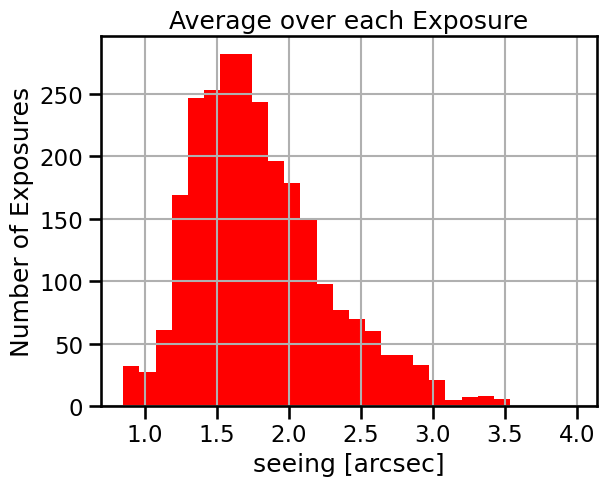

In [202]:
df.fwhm.hist(bins=28,color='r')
plt.xlabel('seeing [arcsec]')
plt.title('Average over each Exposure')
plt.ylabel('Number of Exposures')

Text(0.5, 0, 'Temperature M1')

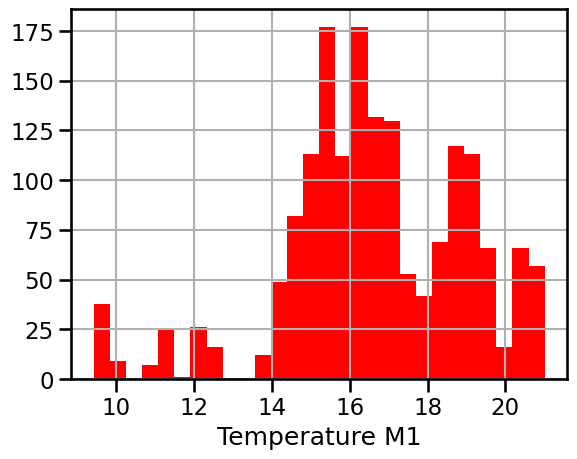

In [203]:
df.M1.hist(bins=28, color='r')
plt.xlabel('Temperature M1')

Text(0.5, 0, '$T_{\\rm M1} - T^{sonic}_{\\rm air}$')

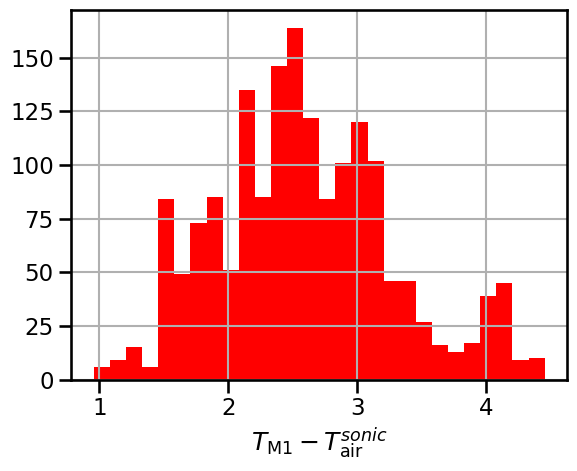

In [204]:
df.deltaTempM1Air.hist(bins=28, color='r')
plt.xlabel(r'$T_{\rm M1} - T^{sonic}_{\rm air}$')

Text(0.5, 0, '$T_{\\rm M1} - T_{\\rm M2}$')

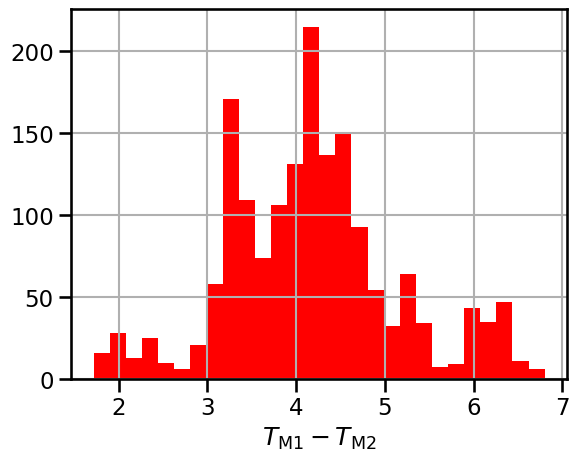

In [205]:
df.deltaTempM1M2.hist(bins=28, color='r')
plt.xlabel(r'$T_{\rm M1} - T_{\rm M2}$')

In [206]:
# # Select data between two specific dates
start_date = '2023-11-01'
# end_date = '2023-11-30'

# start_date = '2024-01-02'
end_date = '2024-04-30'

selected_data = df.loc[start_date:end_date]
selected_data = selected_data.loc[selected_data.hours<5.]

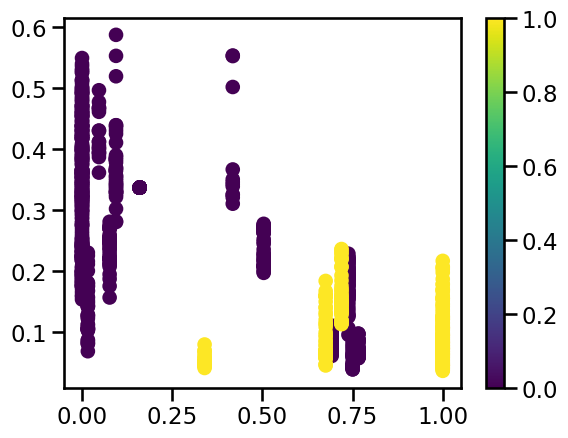

In [207]:
plt.scatter(selected_data.vent_time_frac, selected_data.sonicTemperatureStdDev, c=selected_data.vent_sunset)
plt.colorbar()

<Axes: >

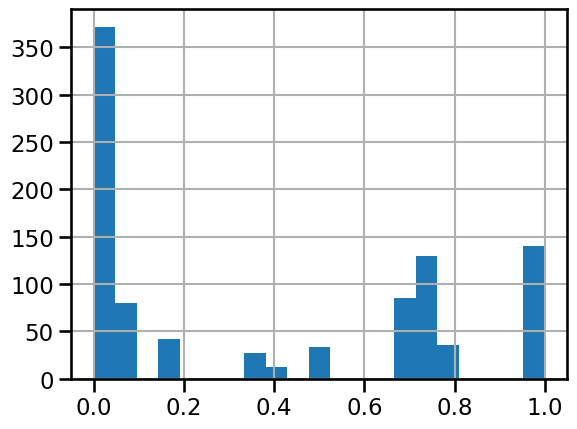

In [208]:
selected_data.vent_time_frac.hist(bins=21)

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from bokeh.palettes import Plasma256

# Assuming selected_data is your DataFrame containing 'fwhm' and 'vent_time_frac' columns

# Number of bins
num_bins = 4

# Define the bins for vent_time_frac
bins = np.linspace(0, 1., num_bins + 1)

ycol = 'fwhm'

keys = {'fwhm':r'seeing [arcsec]', 'sonicTemperatureStdDev':r'Dome Seeing Turbulence: $\sigma(T^{sonic})$'}

In [210]:
bins

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

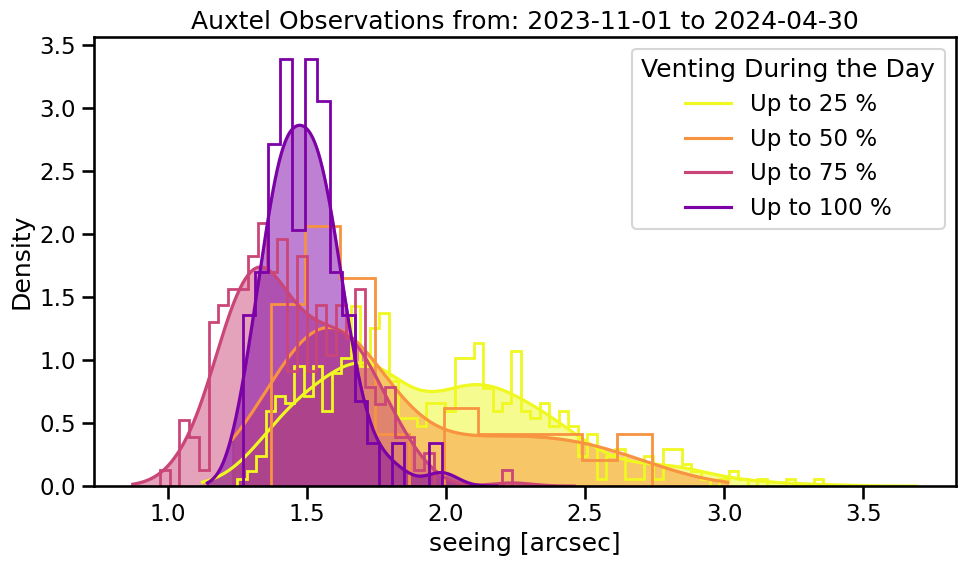

In [211]:
ycol = 'fwhm'
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define the Plasma colormap from Bokeh
plasma_colors = Plasma256[::-1]  # Reverse the colormap to match Bokeh's Plasma

# Group the data by vent_time_frac and compute KDE plots for fwhm in each bin
for i in range(num_bins):
    vent_time_frac_min = bins[i]
    vent_time_frac_max = bins[i + 1]
    bin_data = selected_data[(selected_data['vent_time_frac'] >= vent_time_frac_min) & (selected_data['vent_time_frac'] < vent_time_frac_max)]
    fwhm_values = bin_data[ycol]
    
    # Compute KDE using gaussian_kde from scipy
    kde = gaussian_kde(fwhm_values)
    x = np.linspace(fwhm_values.min()*(1-0.1), fwhm_values.max()*(1+0.1), 1000)
    y = kde(x)

    # Plot KDE plot
    ax.plot(x, y, color=plasma_colors[int(i / num_bins * 256)], label=f"Up to {int(100*(vent_time_frac_max))} %")
    ax.fill_between(x, y, alpha=0.5, color=plasma_colors[int(i / num_bins * 256)])
    ax.hist(fwhm_values, bins=int((len(fwhm_values))**(2/3)), color=plasma_colors[int(i / num_bins * 256)], 
            histtype='step', lw=2, density=True)
    
    if i ==1:
        df1 = bin_data
    if i ==0 :
        df0 = bin_data
        
# Set labels and titles
ax.set_xlabel(keys[ycol])
ax.set_ylabel('Density')
ax.legend(title='Venting During the Day')
plt.title('Auxtel Observations from: %s to %s'%(start_date,end_date))
# Show the plot
fig.tight_layout()
fig.savefig('auxtel_seeing_kde_vent.png',dpi=120)

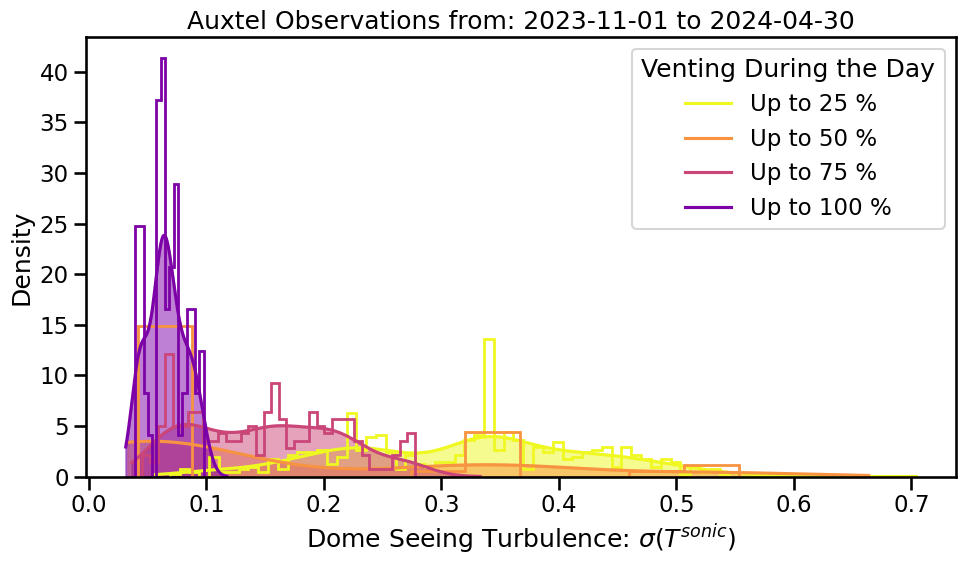

In [212]:
ycol = 'sonicTemperatureStdDev'
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define the Plasma colormap from Bokeh
plasma_colors = Plasma256[::-1]  # Reverse the colormap to match Bokeh's Plasma

# Group the data by vent_time_frac and compute KDE plots for fwhm in each bin
for i in range(num_bins):
    vent_time_frac_min = bins[i]
    vent_time_frac_max = bins[i + 1]
    bin_data = selected_data[(selected_data['vent_time_frac'] >= vent_time_frac_min) & (selected_data['vent_time_frac'] < vent_time_frac_max)]
    fwhm_values = bin_data[ycol]
    
    # Compute KDE using gaussian_kde from scipy
    kde = gaussian_kde(fwhm_values,bw_method='scott')
    x = np.linspace(fwhm_values.min()*(1-0.2), fwhm_values.max()*(1+0.2), 1000)
    y = kde(x)

    # Plot KDE plot
    ax.plot(x, y, color=plasma_colors[int(i / num_bins * 256)], label=f"Up to {int(100*(vent_time_frac_max))} %")
    ax.fill_between(x, y, alpha=0.5, color=plasma_colors[int(i / num_bins * 256)])
    ax.hist(fwhm_values, bins=int((len(fwhm_values))**(2/3)), color=plasma_colors[int(i / num_bins * 256)], 
            histtype='step', lw=2, density=True)

    if i ==1:
        df1 = bin_data
    if i ==0 :
        df0 = bin_data
        
# Set labels and titles
ax.set_xlabel(keys[ycol])
ax.set_ylabel('Density')
ax.legend(title='Venting During the Day')
plt.title('Auxtel Observations from: %s to %s'%(start_date,end_date))
# Show the plot
fig.tight_layout()
fig.savefig('auxtel_dome_seeing_kde_vent.png',dpi=120)



In [482]:
np.min(dTm)

0.9562186714526392

## Komogorov Model

In [546]:
from scipy.optimize import curve_fit

# x0 = 0.4
def modelKomogorov(x, omega_0, omega_n, alpha_m, alpha_d):
    secz, dT_m, dT_d = x
    return (omega_0+
            omega_n** (5/3) * secz +
            alpha_m** (5/3) * (dT_m)**2 +
            alpha_d** (5/3) * dT_d**2 )

def fit_komogorov(secz, dT_d, dT_m, seeing, seeing_err=None):
    # Mask to remove NaN values
    mask = ~np.isnan(secz) & ~np.isnan(dT_d) & ~np.isnan(dT_m) & ~np.isnan(seeing)
    
    # Apply mask
    secz_fit = secz[mask]
    dT_d_fit = dT_d[mask]
    dT_m_fit = dT_m[mask]
    seeing_fit = seeing[mask]
    seeing_err_fit = None if seeing_err is None else seeing_err[mask]
    
    initial_guess = (1.20599089e+00, 1.0, 1.5, 2.95414879e+00)
    popt, pcov = curve_fit(modelKomogorov, (secz_fit, dT_m_fit, dT_d_fit), seeing_fit, sigma=seeing_err_fit, p0=initial_guess)
    
    # Calculate chi-squared
    residuals = seeing_fit - modelKomogorov((secz_fit, dT_m_fit, dT_d_fit), *popt)
    chi_squared = np.sum((residuals / seeing_err_fit)**2) if seeing_err_fit is not None else np.sum(residuals**2)
    dof = len(seeing_fit) - len(popt)
    reduced_chi_squared = chi_squared / dof
    residuals2 = seeing_fit**(3/5) - modelKomogorov((secz_fit, dT_m_fit, dT_d_fit), *popt)**(3/5)
    rmse = np.std(residuals2)
    
    return popt, np.diag(np.sqrt(pcov)), reduced_chi_squared, rmse

In [653]:
start_date = '2024-03-01'
end_date = '2024-04-30'

selected_data = df.loc[start_date:end_date]
selected_data = selected_data.loc[selected_data.hours<9.0]
# mask = selected_data.DAY.to_numpy() != '20240325'
# selected_data = selected_data.loc[mask]

In [654]:
airmass = selected_data.airmass.to_numpy()
dTd = selected_data.sonicTemperatureStdDev.to_numpy()
dTm = selected_data.deltaTempM1Air2.to_numpy()

seeing  = selected_data.fwhm.to_numpy() / airmass ** (-0.6)
seeingErr = selected_data.fwhm_std.to_numpy()

y = seeing**(5/3.)
yErr = (5/3)* (seeing)**(2/3) * seeingErr
pars, pcov, xisqr, sc = fit_komogorov(airmass, dTd, dTm, y, yErr)
# pars, pcov, xisqr, sc = fit_komogorov(airmass[mask], dTd[mask], dTm[mask], y[mask], yErr[mask])
pars

/tmp/ipykernel_38950/523978858.py:33: RuntimeWarning: invalid value encountered in sqrt
  return popt, np.diag(np.sqrt(pcov)), reduced_chi_squared, rmse


array([0.19909601, 1.29929422, 0.06876033, 5.20599585])

In [655]:
xisqr

45.84904444302278

In [656]:
def get_label(pars, pcov, rmse):
    label = (r'$s_0, s_n =(%.2f \pm %.2f), (%.2f \pm %.2f)$' % (pars[0], pcov[0], pars[1], pcov[1]) + '\n' +
             r'$c_m, c_d = (%.2f \pm %.2f), (%.2f \pm %.2f)$' % (pars[2], pcov[2], pars[3], pcov[3]) + '\n' +
             r'RMSE = %.2f arcsec' % rmse)
    return label


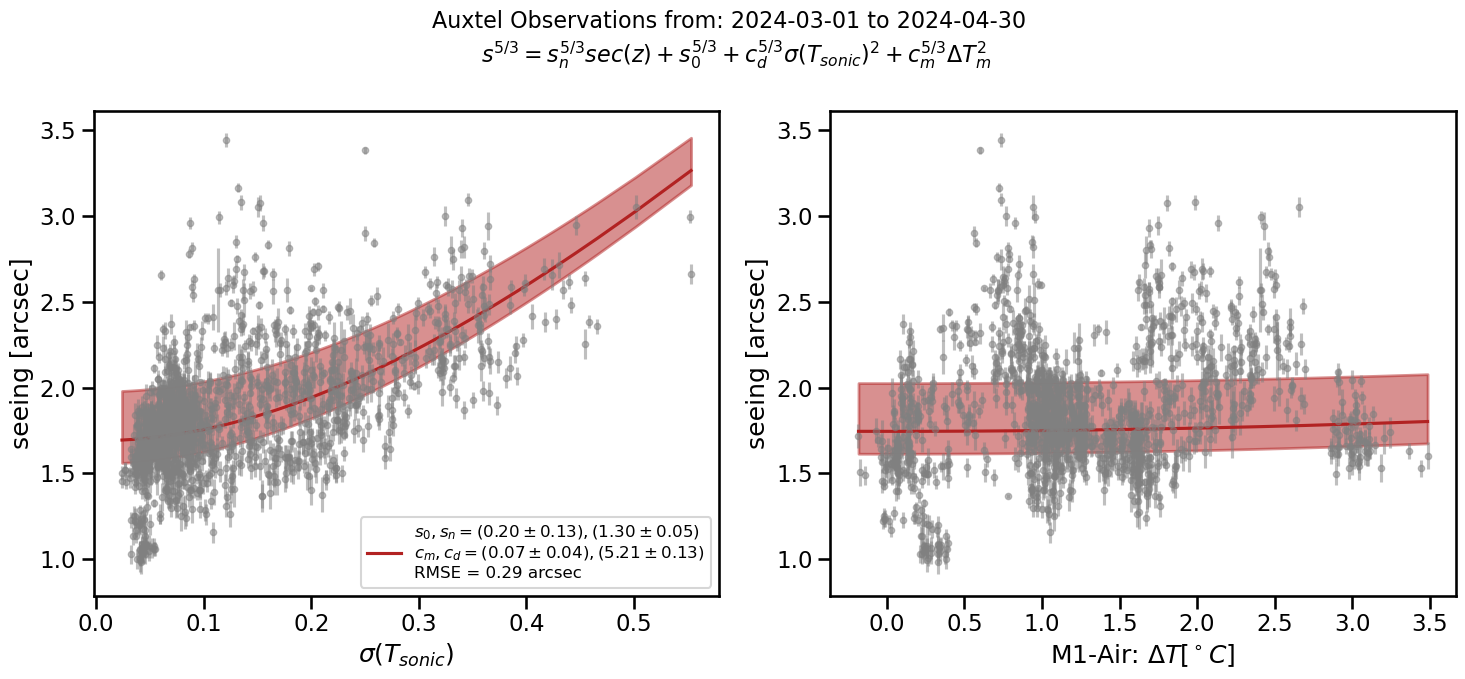

In [657]:
import numpy as np
import matplotlib.pyplot as plt

def plot_seeing_vs_variable(variable, secz, dTd, dTm, seeing, seeingErr, pars, label=None):
    
    ones = np.ones_like(secz) * np.mean(secz)
    meanm = np.ones_like(dTm) * np.nanmean(dTm)
    upa = np.ones_like(secz) * np.nanpercentile(secz, 97.5)
    loa = np.ones_like(secz) * np.nanpercentile(secz, 2.5)

    meand = np.ones_like(dTd) * np.nanpercentile(dTd, 50)
    upd = np.ones_like(dTd) * np.nanpercentile(dTd, 97.5)
    lod = np.ones_like(dTd) * np.nanpercentile(dTd, 2.5)

    if variable == 'sigma':
        variable_data = dTd
        variable_label = r'$\sigma(T_{sonic})$'
        ym = modelKomogorov((ones, meanm, np.sort(variable_data)), *pars)**(3/5)
        yd = modelKomogorov((loa, meanm, np.sort(variable_data)), *pars)**(3/5)
        yu = modelKomogorov((upa, meanm, np.sort(variable_data)), *pars)**(3/5)

    
    elif variable == 'deltaT':
        variable_data = dTm
        variable_label = r'M1-Air: $\Delta T [^\circ C]$'
        ym = modelKomogorov((ones, np.sort(variable_data), meand), *pars)**(3/5)
        yd = modelKomogorov((loa, np.sort(variable_data), meand), *pars)**(3/5)
        yu = modelKomogorov((upa, np.sort(variable_data), meand), *pars)**(3/5)

    else:
        raise ValueError("Invalid variable. Choose 'sigma' or 'deltaT'.")


    plt.errorbar(variable_data, seeing, yerr=seeingErr, ls='none', fmt='.', alpha=0.5, color='grey')
    plt.plot(np.sort(variable_data), ym, color='firebrick', label=label)
    plt.fill_between(np.sort(variable_data), yd, yu, alpha=0.5, color='firebrick', lw=2)
    plt.xlabel(variable_label)
    plt.ylabel(r'seeing [arcsec]')

fig = plt.figure(figsize=(15,7))

plt.subplot(1,2,1)

label = get_label(pars, pcov, sc)
plot_seeing_vs_variable('sigma', airmass, dTd, dTm, seeing, seeingErr, pars, label)
plt.legend(fontsize=12, loc=4)
# plt.title('$s^{5/3} = s_n^{5/3} sec(z) + s_0^{5/3} + c_{d}^{5/3} \Delta T_d^{2} +c_{m}^{5/3} \Delta T_m^{2}$',fontsize=12)
plt.subplot(1,2,2)
# Call the plot function for deltaT_M1-Air
plot_seeing_vs_variable('deltaT',  airmass, dTd, dTm, seeing, seeingErr, pars)
fig.suptitle('Auxtel Observations from: %s to %s \n $s^{5/3} = s_n^{5/3} sec(z) + s_0^{5/3} + c_{d}^{5/3} \sigma(T_{sonic})^{2} +c_{m}^{5/3} \Delta T_m^{2}$'%(start_date,end_date),fontsize=16)
plt.tight_layout()
plt.savefig('komogorov_model_fit.png',dpi=120)


In [658]:
pars

array([0.19909601, 1.29929422, 0.06876033, 5.20599585])

## Fit Per Month

In [659]:
dates = ['2023-11','2023-12','2024-01','2024-02','2024-03','2024-04']

dfs = []
for i in range(len(dates)):
    # Select data between two specific dates
    start_date = dates[i]
    end_date = dates[i]
    selected_data = df.loc[start_date:end_date]
    #dfs.append(selected_data.loc[selected_data.hours>4.0])
    dfs.append(selected_data)
    

In [660]:
df['deltaTempM1Air3'] = df.temperatureItem4 - df.sonicTemperature

In [661]:
paramaters,  perrs, chisqrs, scatters = [], [], [], []
for data in dfs:
    airmass = data.airmass.to_numpy()
    dTd = data.sonicTemperatureStdDev.to_numpy()
    dTm = data.deltaTempM1Air2.to_numpy()
    
    seeing  = data.fwhm.to_numpy() / airmass ** (-0.6)
    seeingErr = data.fwhm_std.to_numpy()
    
    y = seeing**(5/3.)
    yErr = (5/3)* (seeing)**(2/3) * seeingErr
    if np.count_nonzero(~np.isnan(y))>0:
        pars, pcov, xisqr, rmse = fit_komogorov(airmass, dTd, dTm, y, yErr)
    else:
        pars = pcov = [np.nan,np.nan,np.nan,np.nan]
        xisqr = np.nan
        rmse = np.nan
        
    paramaters.append(pars)
    perrs.append(pcov)
    chisqrs.append(xisqr)
    scatters.append(rmse)

paramaters = np.array(paramaters)
perrs = np.array(perrs)
perrs = np.where(perrs >1, np.nan, perrs)

/tmp/ipykernel_38950/523978858.py:33: RuntimeWarning: invalid value encountered in sqrt
  return popt, np.diag(np.sqrt(pcov)), reduced_chi_squared, rmse
/tmp/ipykernel_38950/523978858.py:8: RuntimeWarning: invalid value encountered in scalar power
  alpha_m** (5/3) * (dT_m)**2 +
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Coeficients Komogorov Mdoel')

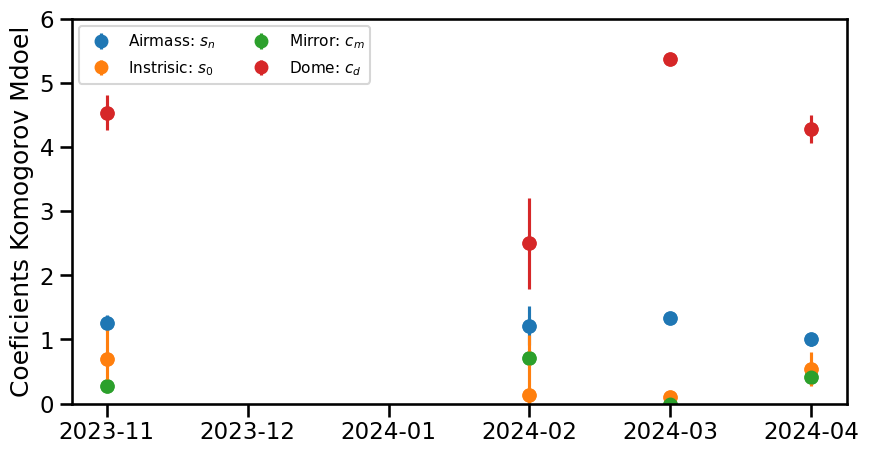

In [671]:
plt.figure(figsize=(10,5))

ix = 1
plt.scatter(dates, paramaters[:,ix])
plt.errorbar(dates, paramaters[:,ix], yerr=perrs[:,ix],fmt='o',label=r'Airmass: $s_n$')

ix = 0
plt.scatter(dates, paramaters[:,ix])
plt.errorbar(dates, paramaters[:,ix], yerr=perrs[:,ix],fmt='o',label=r'Instrisic: $s_0$')

ix = 2
plt.scatter(dates, paramaters[:,ix])
plt.errorbar(dates, paramaters[:,ix], yerr=perrs[:,ix],fmt='o',label=r'Mirror: $c_m$')

ix = 3
plt.scatter(dates, paramaters[:,ix])
plt.errorbar(dates, paramaters[:,ix], yerr=perrs[:,ix],fmt='o',label=r'Dome: $c_d$')
plt.legend(fontsize=11, ncol=2)
plt.ylim(0,6)
plt.ylabel('Coeficients Komogorov Mdoel')
# plt.title('Auxtel Observations from: %s to %s'%(start_date,end_date))

In [672]:
chisqrs

[69.9398695873269,
 nan,
 nan,
 50.25083355173531,
 50.42434937888315,
 30.929816605937557]

In [673]:
np.array(scatters)

array([0.44000477,        nan,        nan, 0.30539553, 0.28930801,
       0.27135565])

In [640]:
# dfs[0].fwhm.std()

## Fit Per Night

In [674]:
days = [str(ei)[:8] for ei in df.EXPID.to_numpy()]
days = [d[:4]+'-'+d[4:6]+'-'+d[6:8] for d in days]
df['day'] = days
udays = np.unique(days)

In [675]:
udays

array(['2023-05-11', '2023-07-04', '2023-07-05', '2023-07-06',
       '2023-07-18', '2023-08-01', '2023-08-02', '2023-08-03',
       '2023-08-17', '2023-08-29', '2023-09-14', '2023-09-27',
       '2023-09-28', '2023-10-10', '2023-10-11', '2023-11-07',
       '2023-11-08', '2023-11-13', '2023-11-14', '2023-11-15',
       '2023-11-16', '2023-11-20', '2023-11-21', '2023-11-27',
       '2023-11-28', '2023-11-29', '2023-11-30', '2024-02-12',
       '2024-02-13', '2024-03-04', '2024-03-05', '2024-03-06',
       '2024-03-07', '2024-03-08', '2024-03-12', '2024-03-13',
       '2024-03-14', '2024-03-21', '2024-03-25', '2024-03-26',
       '2024-03-27', '2024-03-28', '2024-03-29', '2024-04-01',
       '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
       '2024-04-08', '2024-04-09', '2024-04-10'], dtype='<U10')

In [676]:
dfs = []
for day in udays:
    # Select data between two specific dates
    start_date = dates[i]
    end_date = dates[i]
    selected_data = df.loc[df.day == day]
    #dfs.append(selected_data.loc[selected_data.hours>4.0])
    dfs.append(selected_data)
    

In [686]:
paramaters,  perrs, chisqrs = [], [], []

corrs = []
for data in dfs:
    airmass = data.airmass.to_numpy()
    dTd = data.sonicTemperatureStdDev.to_numpy()
    dTm = data.deltaTempM1Air2.to_numpy()
    
    seeing  = data.fwhm.to_numpy() / airmass ** (-0.6)
    seeingErr = data.fwhm_std.to_numpy()
    
    y = seeing**(5/3.)
    yErr = (5/3)* (seeing)**(2/3) * seeingErr
    if (np.count_nonzero(~np.isnan(y))>2)&(np.count_nonzero(~np.isnan(dTm))>2):
        try:
            pars, pcov, xisqr, rmse = fit_komogorov(airmass, dTd, dTm, y, yErr)
        except:
            pars = pcov = [np.nan,np.nan,np.nan,np.nan]
            xisqr = np.nan

    else:
        pars = pcov = [np.nan,np.nan,np.nan,np.nan]
        xisqr = np.nan

    m = data[['deltaTempM1Air','sonicTemperatureStdDev']].corr().deltaTempM1Air.sonicTemperatureStdDev
    corrs.append(m)
    paramaters.append(pars)
    perrs.append(pcov)
    chisqrs.append(xisqr)

paramaters = np.array(paramaters)
perrs = np.array(perrs)
perrs = np.where(perrs >1, np.nan, perrs)

/tmp/ipykernel_38950/523978858.py:8: RuntimeWarning: invalid value encountered in scalar power
  alpha_m** (5/3) * (dT_m)**2 +
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_38950/523978858.py:8: RuntimeWarning: invalid value encountered in scalar power
  alpha_m** (5/3) * (dT_m)**2 +
/tmp/ipykernel_38950/523978858.py:9: RuntimeWarning: invalid value encountered in scalar power
  alpha_d** (5/3) * dT_d**2 )
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_38950/523978858.py:9: RuntimeWarning: inva

<ErrorbarContainer object of 3 artists>

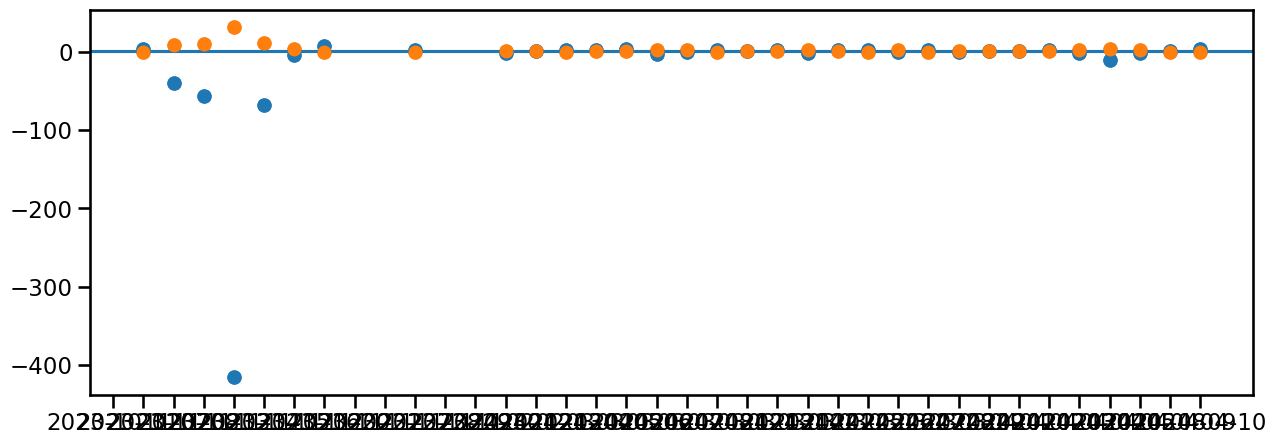

In [688]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ix = 0
plt.scatter(udays, paramaters[:,ix])
plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')
plt.axhline(1.2)

ix = 1
plt.scatter(udays, paramaters[:,ix])
plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')

# ix = 2
# plt.scatter(udays, paramaters[:,ix])
# plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')

# ix = 3
# plt.scatter(udays, paramaters[:,ix])
# plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

<ErrorbarContainer object of 3 artists>

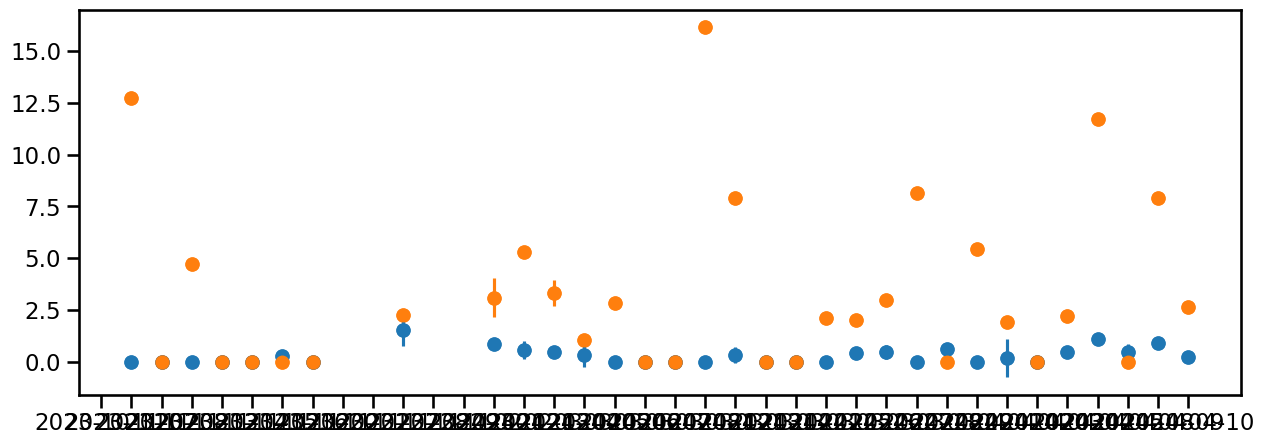

In [689]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

# ix = 0
# plt.scatter(udays, paramaters[:,ix])
# plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')
# plt.axhline(1.17)

# ix = 1
# plt.scatter(udays, paramaters[:,ix])
# plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')

ix = 2
plt.scatter(udays, paramaters[:,ix])
plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')

ix = 3
plt.scatter(udays, paramaters[:,ix])
plt.errorbar(udays, paramaters[:,ix], yerr=perrs[:,ix],fmt='o')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

In [678]:
np.nanmedian(paramaters[:,ix][paramaters[:,ix]>0.3])

TypeError: list indices must be integers or slices, not tuple

In [75]:
# plt.scatter(udays, corrs)

## Nov Nights

In [87]:
# Select data between two specific dates
start_date = '2023-11-01'
end_date = '2023-11-30'
selected_data = df.loc[start_date:end_date]


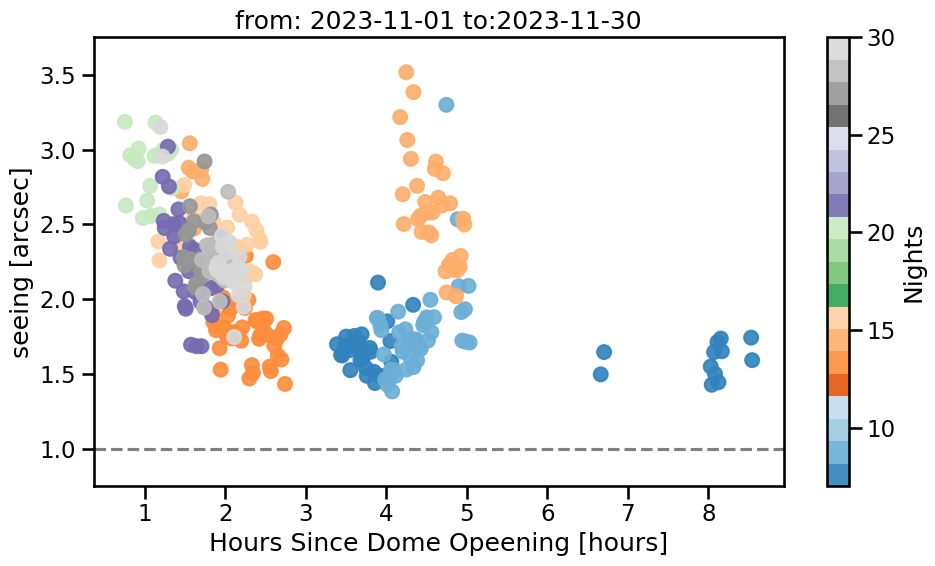

In [88]:
plt.figure(figsize=(10,6))
d, m, e = selected_data.hours,selected_data.fwhm_corr, selected_data.fwhm_std 
plt.scatter(d, m, c=selected_data.index.day, s=100, cmap='tab20c', alpha=0.9)
# plt.errorbar(d, m, yerr=e, capsize=2, fmt='o', markersize=0, color='grey')
plt.axhline(1.0, ls='--', color='grey')
plt.ylabel('seeing [arcsec]')
plt.xlabel('Hours Since Dome Opeening [hours]')
plt.title('from: %s to:%s'%(start_date,end_date))
plt.colorbar().set_label('Nights')
plt.tight_layout()
plt.ylim(0.75, 3.75)
# plt.xlim(0.25,9.0)
plt.savefig('march_seeing_decay_nov2023.png',dpi=120)

## March Nights

In [89]:
# Select data between two specific dates
start_date = '2024-03-01'
end_date = '2024-03-31'
selected_data = df.loc[start_date:end_date]


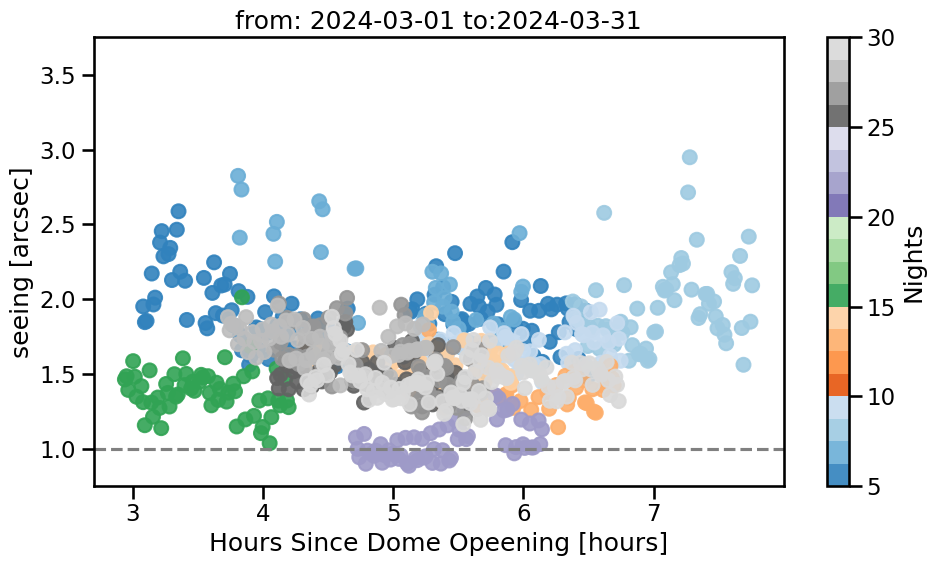

In [90]:
plt.figure(figsize=(10,6))
d, m, e = selected_data.hours,selected_data.fwhm_corr, selected_data.fwhm_std 
plt.scatter(d, m, c=selected_data.index.day, s=100, cmap='tab20c', alpha=0.9)
# plt.errorbar(d, m, yerr=e, capsize=2, fmt='o', markersize=0, color='grey')
plt.axhline(1.0, ls='--', color='grey')
plt.ylabel('seeing [arcsec]')
plt.xlabel('Hours Since Dome Opeening [hours]')
plt.title('from: %s to:%s'%(start_date,end_date))
plt.colorbar().set_label('Nights')
plt.tight_layout()
plt.ylim(0.75, 3.75)
plt.savefig('march_seeing_decay_march2024.png',dpi=120)

## Sub-Arcsec Seeing

In [91]:
good_seeing = df.fwhm<1.0
days, counts = np.unique(df.loc[good_seeing].index.date, return_counts=True)
days, counts

(array([datetime.date(2024, 3, 15), datetime.date(2024, 3, 22),
        datetime.date(2024, 4, 3)], dtype=object),
 array([ 1, 35,  1]))

Text(0.5, 1.0, 'Night: 2024-03-22')

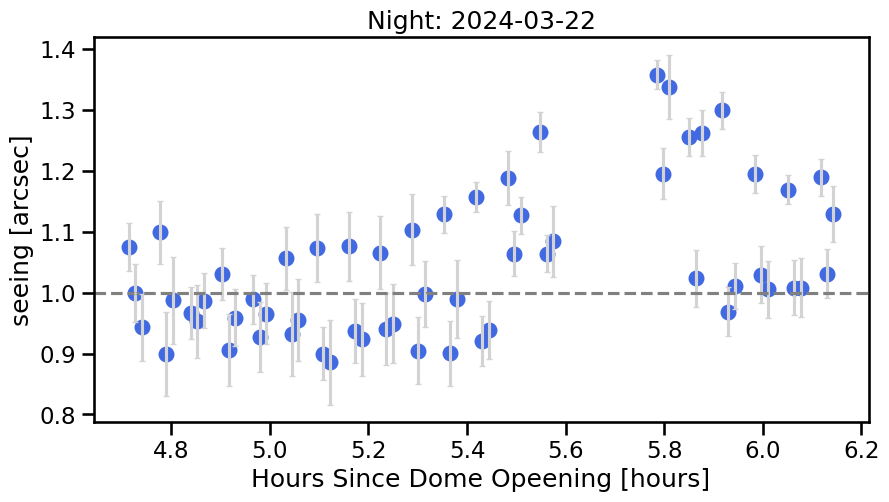

In [92]:
start_date = '2024-03-22'
end_date = '2024-03-22'
gg = df.loc[start_date:end_date]

plt.figure(figsize=(10,5))
d, m, e = gg.hours,gg.fwhm_corr, gg.fwhm_std 

plt.errorbar(d, m, yerr=e, capsize=2., fmt='o', markersize=1, color='lightgrey')
plt.scatter(d, m, c='royalblue', s=100)
plt.axhline(1.0, ls='--', color='grey')
plt.ylabel('seeing [arcsec]')
plt.xlabel('Hours Since Dome Opeening [hours]')
plt.title('Night: %s'%(start_date))
# plt.colorbar().set_label('Day')


## Binned Data

In [691]:
first_half = df.night_period==1
sec_half = df.night_period==2
th_half = df.night_period==3
last_half = (df.night_period==4)|(df.night_period==5)


/tmp/ipykernel_38950/2674835608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(pd.cut(df[xcol], bins))


Text(0.5, 0, '$\\sigma(T_{\\rm sonic})$')

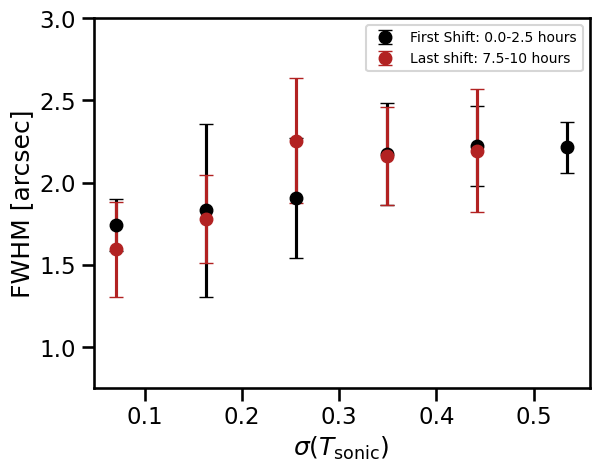

In [705]:
pl, ph = np.nanpercentile(df.sonicTemperatureStdDev, [0.01,99.99])
sbins = np.linspace(pl, ph, 7)

plot_binned_data(df.loc[first_half], 'sonicTemperatureStdDev', 'fwhm', sbins, color='k', label='First Shift: 0.0-2.5 hours')
plot_binned_data(df.loc[last_half], 'sonicTemperatureStdDev', 'fwhm', sbins, color='firebrick', label='Last shift: 7.5-10 hours')

plt.ylim(0.75,3.0)
plt.ylabel('FWHM [arcsec]')
plt.legend(fontsize=10)
plt.xlabel(r'$\sigma(T_{\rm sonic})$')
# plt.xlabel(r'Temp M1 - Temp M2 [deg C] ')
# plt.title('During Exposure')

/tmp/ipykernel_38950/2674835608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(pd.cut(df[xcol], bins))


Text(0.5, 0, 'Temp M1 - Temp Air [deg C] ')

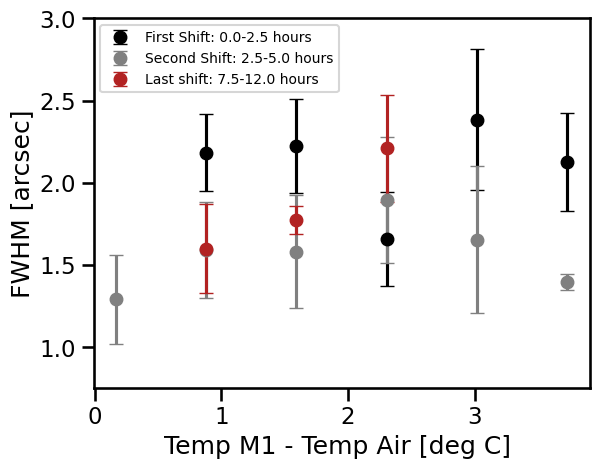

In [711]:
pl, ph = np.nanpercentile(df.deltaTempM1Air2, [0.01,99.99])
dtbins = np.linspace(pl, ph, 7)

plot_binned_data(df.loc[first_half], 'deltaTempM1Air2', 'fwhm', dtbins, color='k', label='First Shift: 0.0-2.5 hours')
plot_binned_data(df.loc[sec_half], 'deltaTempM1Air2', 'fwhm', dtbins, color='grey', label='Second Shift: 2.5-5.0 hours')
plot_binned_data(df.loc[last_half], 'deltaTempM1Air2', 'fwhm', dtbins, color='firebrick', label='Last shift: 7.5-12.0 hours')

plt.ylim(0.75,3.0)
plt.ylabel('FWHM [arcsec]')
plt.legend(fontsize=10)
plt.xlabel(r'Temp M1 - Temp Air [deg C] ')
# plt.title('During Exposure')

In [93]:
day = '20240321'
efd_fname = '../data/efd/efd_thermal_data_%s.csv'%(day)
efd = pd.read_csv(efd_fname, index_col=0, parse_dates=True)

In [94]:
day = '20240320'
efd_fname = '../data/efd/efd_thermal_data_%s.csv'%(day)
efd2 = pd.read_csv(efd_fname, index_col=0, parse_dates=True)

In [95]:
day = '20240319'
efd_fname = '../data/efd/efd_thermal_data_%s.csv'%(day)
efd3 = pd.read_csv(efd_fname, index_col=0, parse_dates=True)

In [96]:
# plt.figure(figsize=(10,6))
# efd['speed'].rolling(window='20min').mean().plot()
# plt.figure(figsize=(10,6))
# efd2['speed'].rolling(window='20min').mean().plot()

In [97]:
efd_gg = pd.concat([efd3,efd2,efd])
efd_gg.index

DatetimeIndex(['2024-03-19 09:00:00-03:00', '2024-03-19 09:00:30-03:00',
               '2024-03-19 09:01:00-03:00', '2024-03-19 09:01:30-03:00',
               '2024-03-19 09:02:00-03:00', '2024-03-19 09:02:30-03:00',
               '2024-03-19 09:03:00-03:00', '2024-03-19 09:03:30-03:00',
               '2024-03-19 09:04:00-03:00', '2024-03-19 09:04:30-03:00',
               ...
               '2024-03-22 08:55:00-03:00', '2024-03-22 08:55:30-03:00',
               '2024-03-22 08:56:00-03:00', '2024-03-22 08:56:30-03:00',
               '2024-03-22 08:57:00-03:00', '2024-03-22 08:57:30-03:00',
               '2024-03-22 08:58:00-03:00', '2024-03-22 08:58:30-03:00',
               '2024-03-22 08:59:00-03:00', '2024-03-22 08:59:30-03:00'],
              dtype='datetime64[ns, UTC-03:00]', length=8640, freq=None)

In [ ]:
plt.figure(figsize=(10,5))
efd_gg['sonicTemperatureStdDev'].rolling(window='20min').mean().plot()
plt.axhline(0.1)

efd_gg['maxSpeed'].rolling(window='20min').mean().plot()


In [ ]:
plt.figure(figsize=(10,6))
efd['maxSpeed'].rolling(window='20min').mean().plot()

In [ ]:
plt.figure(figsize=(10,6))
efd['deltaTempM1Air'].rolling(window='1h').mean().plot()
plt.figure(figsize=(10,6))
efd2['deltaTempM1Air'].rolling(window='1h').mean().plot()

In [ ]:
start_date = '2024-04-03'
end_date = '2024-04-03'
gg = df.loc[start_date:end_date]

In [ ]:
# gg.index.min()

In [ ]:
# gg.fwhm.mean()

In [ ]:
# Step 2: Check if the values in the filtered time series decrease over time
column_name = 'deltaTempM1Air'  # Replace 'column_name' with the actual column name in your DataFrame
filtered_series = efd2[column_name]#.rolling(window='1h').mean()
filtered_series = filtered_series.between_time('12:00', '23:00')

# Step 3: Check if there is any period of decreasing values within the filtered series
is_decreasing_period = any(filtered_series > 0.05)

if is_decreasing_period:
    print("There is at least one period of decreasing values during the time window of 17:00 to 21:00.")
else:
    print("There is no period of decreasing values during the time window of 17:00 to 21:00.")


In [ ]:
import glob

In [ ]:
fmri

In [ ]:
def get_efd_data(day):
    efd_fname = '../data/efd/efd_thermal_data_%s.csv'%(day)
    efd = pd.read_csv(efd_fname, index_col=0, parse_dates=True)
    return efd
    
def get_cooling_rate(df, col, t0='13:00',tend='03:00', deriv=1):
    filtered_series = df[col].rolling(window='20min').mean()
    filtered_series = filtered_series.between_time(t0, tend)
    dthours = (np.diff(filtered_series.index)[0]).total_seconds()/3600

    window_length = 91  # Adjust the window length as needed
    polyorder = 3  # Adjust the polynomial order as needed
    smoothed_data = savgol_filter(filtered_series, window_length, polyorder, deriv=deriv, delta=dthours)
    dt = filtered_series.index.values  # Compute the time step
    dt = pd.to_datetime(dt)
    return dt, smoothed_data


In [1288]:
fnames = glob.glob('../data/efd/efd_thermal_data_202403*')
days = [fname.split('_')[-1].split('.')[0] for fname in fnames]
days = np.sort(np.unique(days))

curves = []
data = get_efd_data(days[-1])
dt, s1 = get_cooling_rate(data, 'deltaTempM1Air', t0='13:00',tend='23:00')

for day in days[8:12]:
    data = get_efd_data(day)
    _, s1 = get_cooling_rate(data, 'deltaTempM1Air', t0='13:00',tend='23:00', deriv=1)
    f1 = pd.DataFrame({'Local Time':dt, r"$\Delta(T_{M1}-T_{air})$ Rate [C/hours]": s1, "date":day})
    curves.append(f1)

fmri = pd.concat(curves)

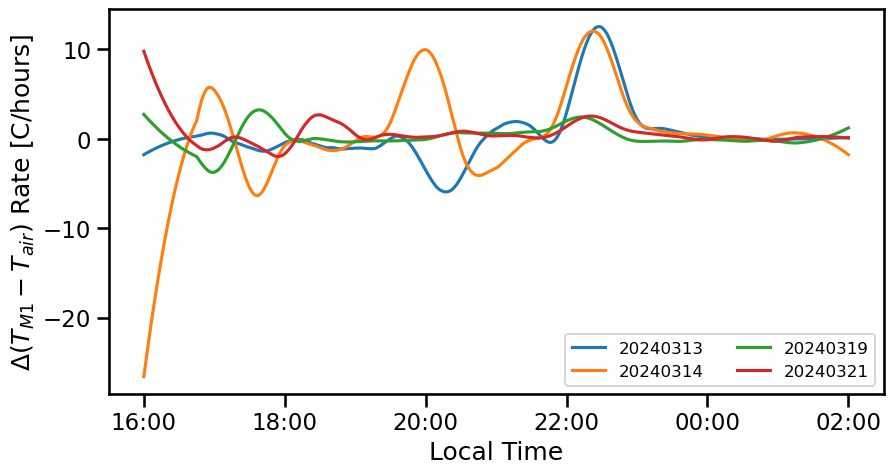

In [1289]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="Local Time", y= r"$\Delta(T_{M1}-T_{air})$ Rate [C/hours]", hue="date",
             data=fmri)

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.legend(fontsize=12, ncol=2)
# plt.ylim(-10,15)

In [1290]:
# Select data between two specific dates
start_date = '2024-03-12'
end_date = '2024-03-22'
selected_data = df.loc[start_date:end_date]


In [1291]:
# help(mdates.DateLocator)

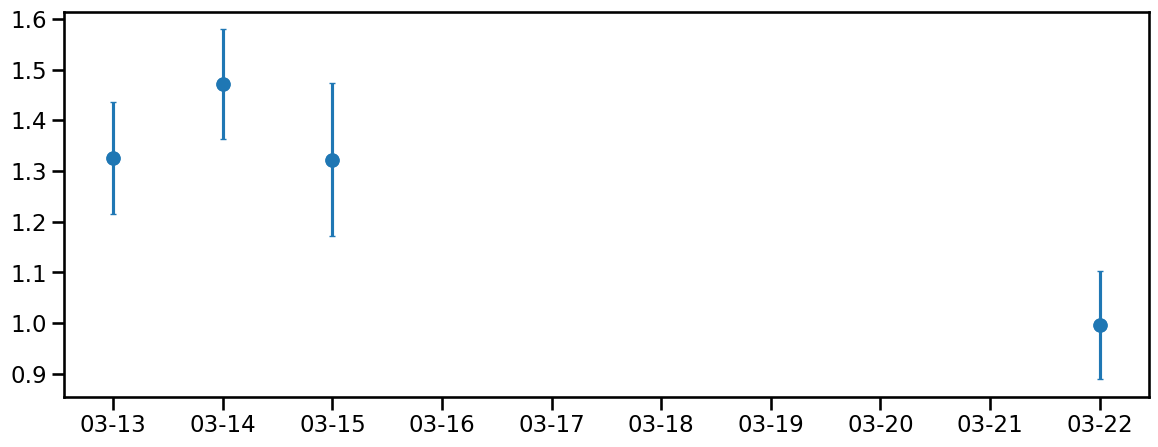

In [1292]:
fig, ax = plt.subplots(1,1,figsize=(14,5))
d, m, e = get_timeline(selected_data)
plt.scatter(d, m)
plt.errorbar(d, m, yerr=e, capsize=2, fmt='o')
# plt.xaxis.set_fontsize(12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


In [1293]:
fnames = glob.glob('../data/efd/efd_thermal_data_202403*')
days = [fname.split('_')[-1].split('.')[0] for fname in fnames]
days = np.unique(days)

curves = []
data = get_efd_data(days[-1])
dt, s1 = get_cooling_rate(data, 'temperatureItem0', t0='13:00',tend='03:00')

for day in days[8:12]:
    data = get_efd_data(day)
    _, s1 = get_cooling_rate(data, 'temperatureItem0', t0='13:00',tend='03:00', deriv=1)
    f1 = pd.DataFrame({'Local Time':dt, r"$T_{M1} [^\circ C]$": s1, "date":day})
    curves.append(f1)

fmri = pd.concat(curves)

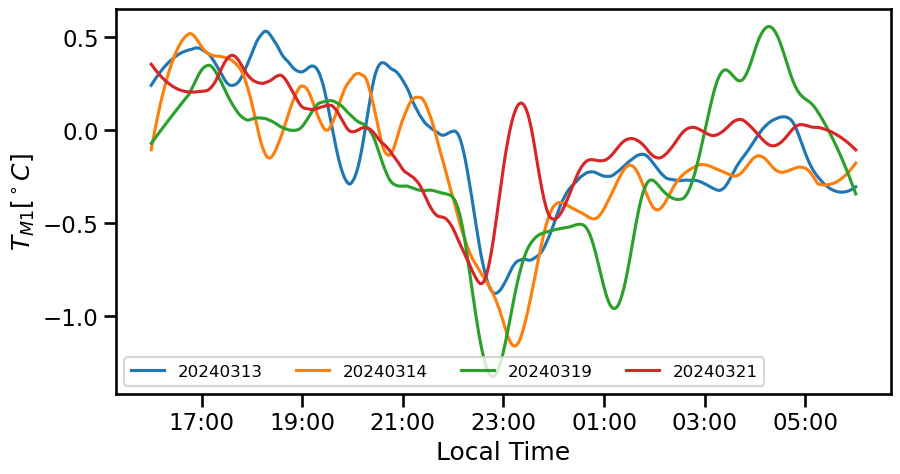

In [1294]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="Local Time", y= r"$T_{M1} [^\circ C]$", hue="date",
             data=fmri)

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.legend(fontsize=12, ncol=5)
# plt.ylim(-10,15)

In [1295]:
# days

<Axes: >

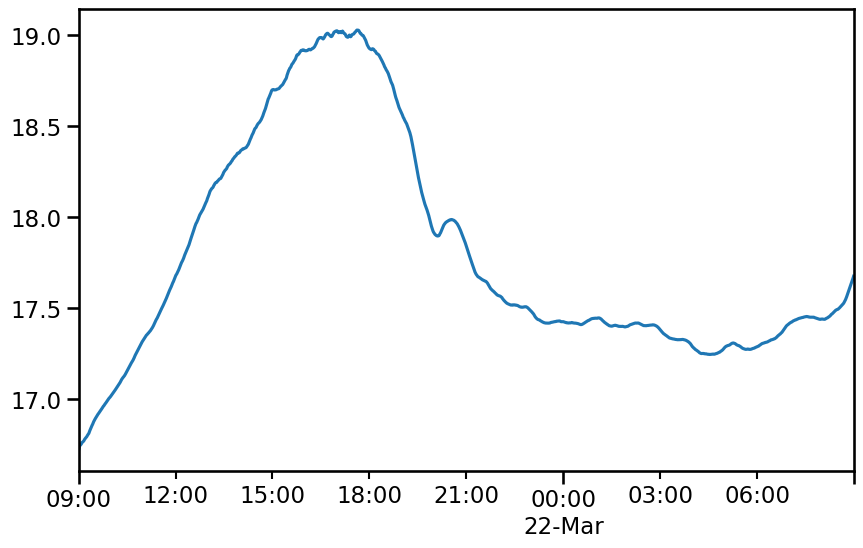

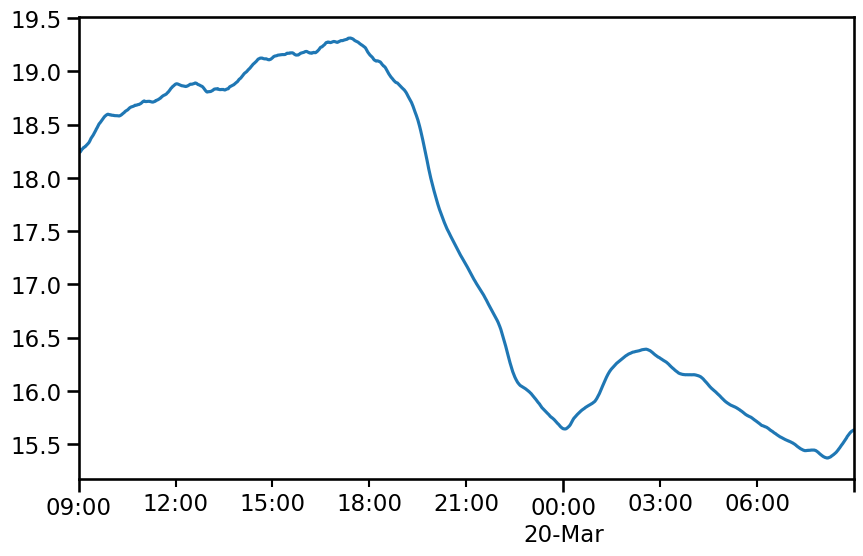

In [1296]:
plt.figure(figsize=(10,6))
efd['temperatureItem0'].rolling(window='20min').mean().plot()
plt.figure(figsize=(10,6))
efd2['temperatureItem0'].rolling(window='20min').mean().plot()


Text(0.5, 1.0, 'Night: 2024-04-03')

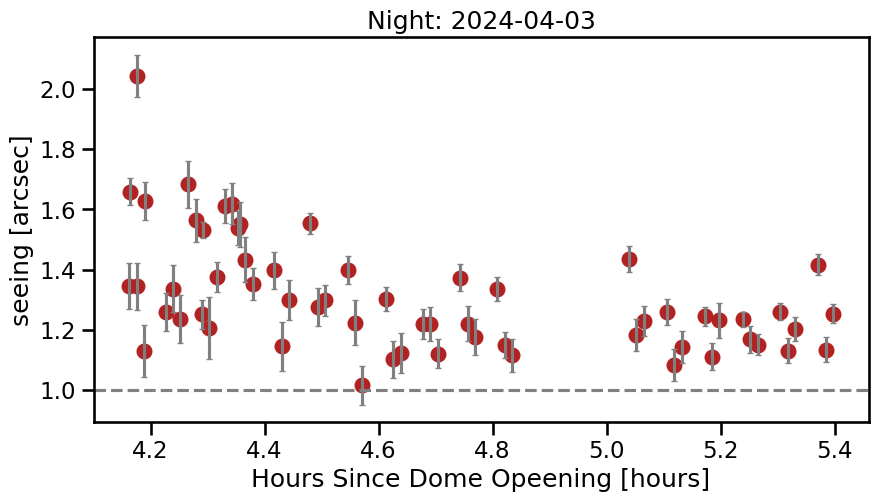

In [1297]:
start_date = '2024-04-03'
end_date = '2024-04-03'
gg = df.loc[start_date:end_date]

plt.figure(figsize=(10,5))
d, m, e = gg.hours,gg.fwhm_corr, gg.fwhm_std 

plt.errorbar(d, m, yerr=e, capsize=2., fmt='o', markersize=0, color='grey')
plt.scatter(d, m, c='firebrick', s=100)
plt.axhline(1.0, ls='--', color='grey')
plt.ylabel('seeing [arcsec]')
plt.xlabel('Hours Since Dome Opeening [hours]')
plt.title('Night: %s'%(start_date))
# plt.colorbar().set_label('Day')


## Model Dome Seeing 

In [1298]:
# keys = {}

In [1359]:
# # Select data between two specific dates
start_date = '2023-11-01'
end_date = '2023-11-30'

# start_date = '2024-03-01'
# end_date = '2024-03-31'

selected_data = df.loc[start_date:end_date]


[1.74433224 0.75214979 0.13756393]
0.3755614527787145


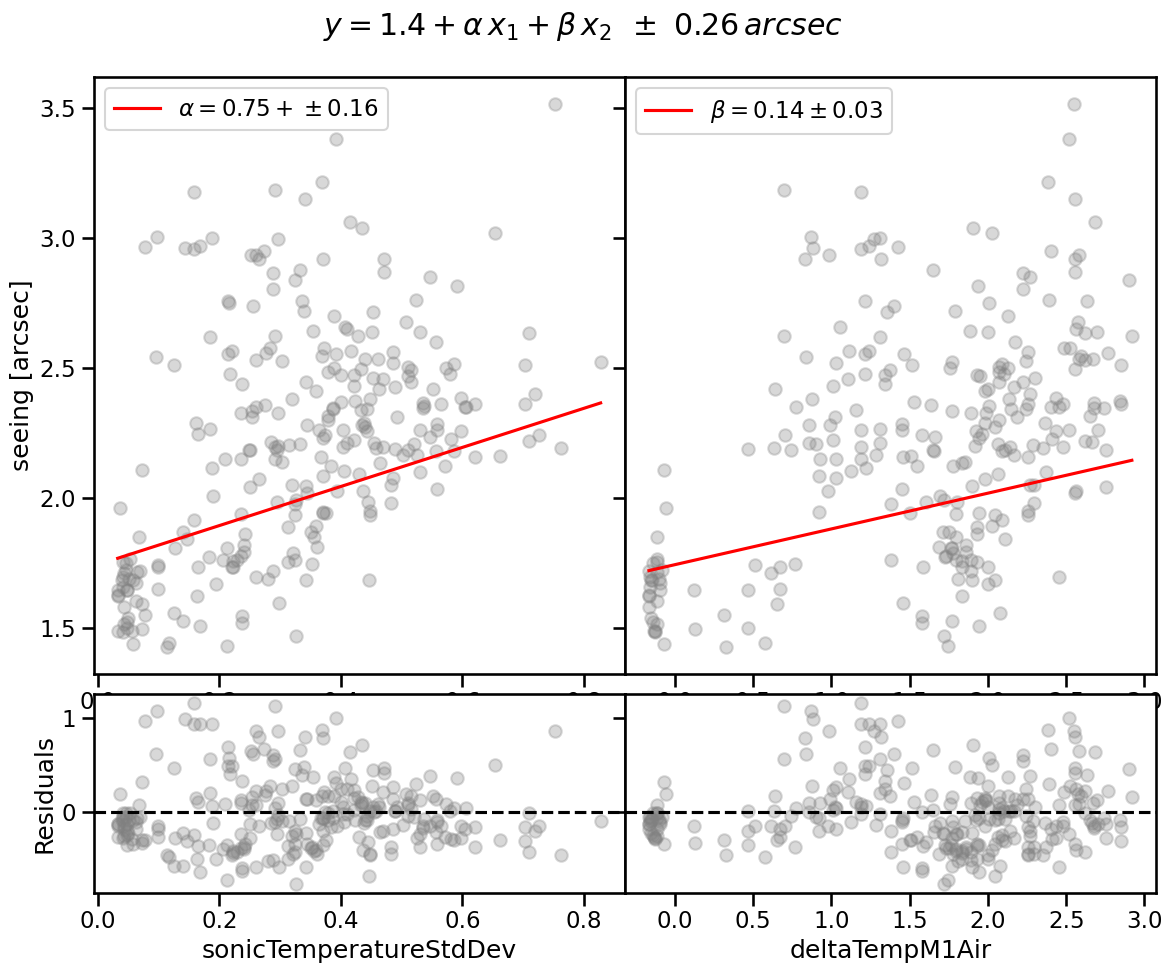

In [1360]:
xcol2, xcol1 = 'deltaTempM1Air', 'sonicTemperatureStdDev'
x1 = selected_data[xcol1].to_numpy()
x2 = selected_data[xcol2].to_numpy()
y = selected_data['fwhm_corr'].to_numpy()

title = r'$y = 1.4 + \alpha \,  x_1 + \beta \,  x_2 \, \, \, \pm \,\, 0.26 \,arcsec $'
plot_fit_poly_res(x1, x2, y, xcol1, xcol2, title=title)

# plot_fit_poly_res(x1, x2, y, keys[xcol1], keys[xcol2], title=title)

In [1316]:
chisqrs

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 51.805200807872666,
 nan,
 8.618142085144445,
 104.55525531518771,
 18.060284329032957,
 4.30654972677912,
 12.17365094569219,
 22.476772138600584,
 9.396762894868449,
 7.297769999907528,
 7.46332408605121,
 nan,
 89.24385325800831,
 19.988771470745434,
 23.70914607484503,
 43.95987012533909,
 106.76613385126615,
 67.83016474773137,
 4.457590793925096,
 34.04773040180073,
 5.320047643404459,
 49.39764684873161,
 108.60429198263019,
 13.802355719991182,
 19.34494642203722,
 4.829511649698214,
 6.73935729039179,
 2.206446174689521,
 14.012369555369885,
 62.781450876491114,
 5.387217679203774,
 30.912453002798078,
 6.736928764633538,
 24.89236319097651,
 63.856361685840625,
 16.80513265918893]

## Plot Functions

In [1317]:
def get_timeline(df,col='fwhm'):
    fwhm = df[[col]].dropna().copy()
    
    # Resample the 'fwhm' column to daily frequency
    daily_fwhm = fwhm.resample('D')
    
    # Calculate the mean and std
    dstats = daily_fwhm.agg(['mean', 'std'])

    d = dstats[col].index
    m = dstats[col]['mean'].to_numpy()
    e = dstats[col]['std'].to_numpy()
    return d, m, e

### Binned Data

In [699]:
def plot_binned_data(df, xcol, ycol, bins, color=None, label=None):    
    # Group data by bins
    groups = df.groupby(pd.cut(df[xcol], bins))
    
    # Calculate mean and standard deviation for each bin
    bin_means = groups[ycol].mean()
    bin_stds = groups[ycol].std()
    
    # Extract bin edges for plotting
    bin_edges = 0.5*(bins[1:]+bins[:-1])
    
    # Plot binned data with error bars
    plt.errorbar(bin_edges, bin_means, yerr=bin_stds, color=color,
                 fmt='o', capsize=5, label=label)
    
    # Add labels and title
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    


### Polynomial Fit

In [695]:
def get_fake_data():
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Generate fake data for x1, x2, and y
    n_samples = 100
    x1_slope = 0.4
    x2_slope = 1.6
    x1_scatter = 0.1
    x2_scatter = 0.15
    
    # Generate x1 and x2 with some random noise
    x1 = np.random.randn(n_samples) * x1_scatter
    x2 = np.random.randn(n_samples) * x2_scatter
    
    # Generate y using the specified slopes
    y = x1 * x1_slope + x2 * x2_slope + np.random.randn(n_samples) * 0.05  # Adding some noise to y
    return x1, x2, y
    

In [696]:
import numpy as np
import statsmodels.api as sm

def fit_poly(x1, x2, yp, show=False):
    #mask = np.isnan(x1)|np.isnan(x2)|np.isnan(yp)
    mask = ~np.isnan(x1) & ~np.isnan(x2) & ~np.isnan(yp)

    # Create the design matrix
    y = yp[mask]
    X = np.column_stack((x1[mask], x2[mask]))
    X = sm.add_constant(X)  # Adding a constant term for intercept
    
    # Fit the linear model
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Print the summary of the fitted model
    if show:
        print(results.summary())
    return results

def plot_fit_poly(x1,x2,y):
    ## make fit
    results =  fit_poly(x1, x2, y)

    x1n = np.linspace(np.nanmin(x1),np.nanmax(x1), 100)
    x2n = np.linspace(np.nanmin(x2),np.nanmax(x2), 100)
    
    X = np.column_stack([x1n, x2n])
    X = sm.add_constant(X)  # Adding a constant term for intercept

    y_pred = results.predict(X)
    ix = np.argsort(y_pred)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Scatter plot of x1 vs y
    axes[0].scatter(x1, y, label='Actual data', color='blue')
    axes[0].plot(x1n, y_pred, label='Predicted values', color='red')
    #axes[0].plot(x1[ix], y_pred[ix], label='Fitted line', color='green')
    axes[0].set_xlabel('sonicTemperatureStdDev')
    axes[0].set_ylabel('Y')
    axes[0].set_title('sonicTemperatureStdDev vs Y')
    axes[0].legend()
    axes[0].grid(True)
    
    # Scatter plot of x2 vs y
    axes[1].scatter(x2, y, label='Actual data', color='blue')
    axes[1].plot(x2n, y_pred, label='Predicted values', color='red')
    #axes[1].plot(x2[ix], y_pred[ix], label='Fitted line', color='green')
    axes[1].set_xlabel('M1-M2')
    axes[1].set_ylabel('Y')
    axes[1].set_title('M1-M2 vs Y')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()

In [697]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def get_model_line(x1, x2, results):
    x1n = np.linspace(np.nanmin(x1), np.nanmax(x1), 100)
    x2n = np.linspace(np.nanmin(x2), np.nanmax(x2), 100)
    
    X = np.column_stack([x1n, x2n])
    X = sm.add_constant(X)  # Adding a constant term for intercept

    y_pred = results.predict(X)
    ix = np.argsort(y_pred)
    return x1n[ix], x2n[ix], y_pred[ix]
    
def plot_fit_poly_res(x1, x2, y, xcol1='x1', xcol2='x2', 
                      label=None, title=None, alpha=0.3):
    # Assuming you have a function fit_poly implemented elsewhere to fit the polynomial
    results = fit_poly(x1, x2, y)
    x1n, x2n, ym = get_model_line(x1, x2, results)
    print(results.params)
    y0, a, b = results.params
    y0e, ae, be = results.bse
    
    y1 = np.poly1d([a,y0])(x1n)
    y2 = np.poly1d([b,y0])(x2n)
    
    ## plot model
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]},sharey='row')
    
    # Plot for x1 vs y
    # Scatter plot
    axes[0, 0].scatter(x1, y, label=label, color='grey', alpha=alpha)
    # Model fit
    axes[0, 0].plot(x1n, y1, label=r'$\alpha=%.2f +\pm %.2f$'%(a,ae), color='red')
    
    axes[0, 0].set_ylabel('seeing [arcsec]')
    
    #axes[0, 0].set_title(f'seeing vs {xcol}')
    axes[0, 0].legend()

    # Residual plot
    y_pred_x1 = results.predict(sm.add_constant(np.c_[x1,x2]))
    residuals_x1 = y - y_pred_x1
    axes[1, 0].scatter(x1, residuals_x1, color='grey', alpha=alpha)
    axes[1, 0].axhline(y=0, color='black', linestyle='--')
    axes[1, 0].set_xlabel(f'{xcol1}')
    axes[1, 0].set_ylabel('Residuals')
    #axes[1, 0].set_title('Residuals for sonicTemperatureStdDev vs Y')

    # Plot for x2 vs y
    # Scatter plot
    axes[0, 1].scatter(x2, y, label=label, color='grey', alpha=alpha)
    # Model fit
    y_pred_x2 = results.predict(sm.add_constant(np.c_[x1,x2]))
    axes[0, 1].plot(x2n, y2, label=r'$\beta=%.2f \pm %.2f$'%(b,be), color='red')
    #axes[0, 1].set_ylabel('Y')
    #axes[0, 1].set_title('M1-M2 vs Y')
    axes[0, 1].legend()

    # Residual plot
    residuals_x2 = y - y_pred_x2
    axes[1, 1].scatter(x2, residuals_x2, color='grey', alpha=alpha)
    axes[1, 1].axhline(y=0, color='black', linestyle='--')
    axes[1, 1].set_xlabel(f'{xcol2}')
    #axes[1, 1].set_ylabel('Residuals')
    #axes[1, 1].set_title('Residuals for M1-M2 vs Y')

    print(np.nanstd(y-y_pred_x1))
    fig.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.05, wspace=0.0)
    plt.show()


[0.00443243 0.51304468 1.59590774]
0.052947850373098675


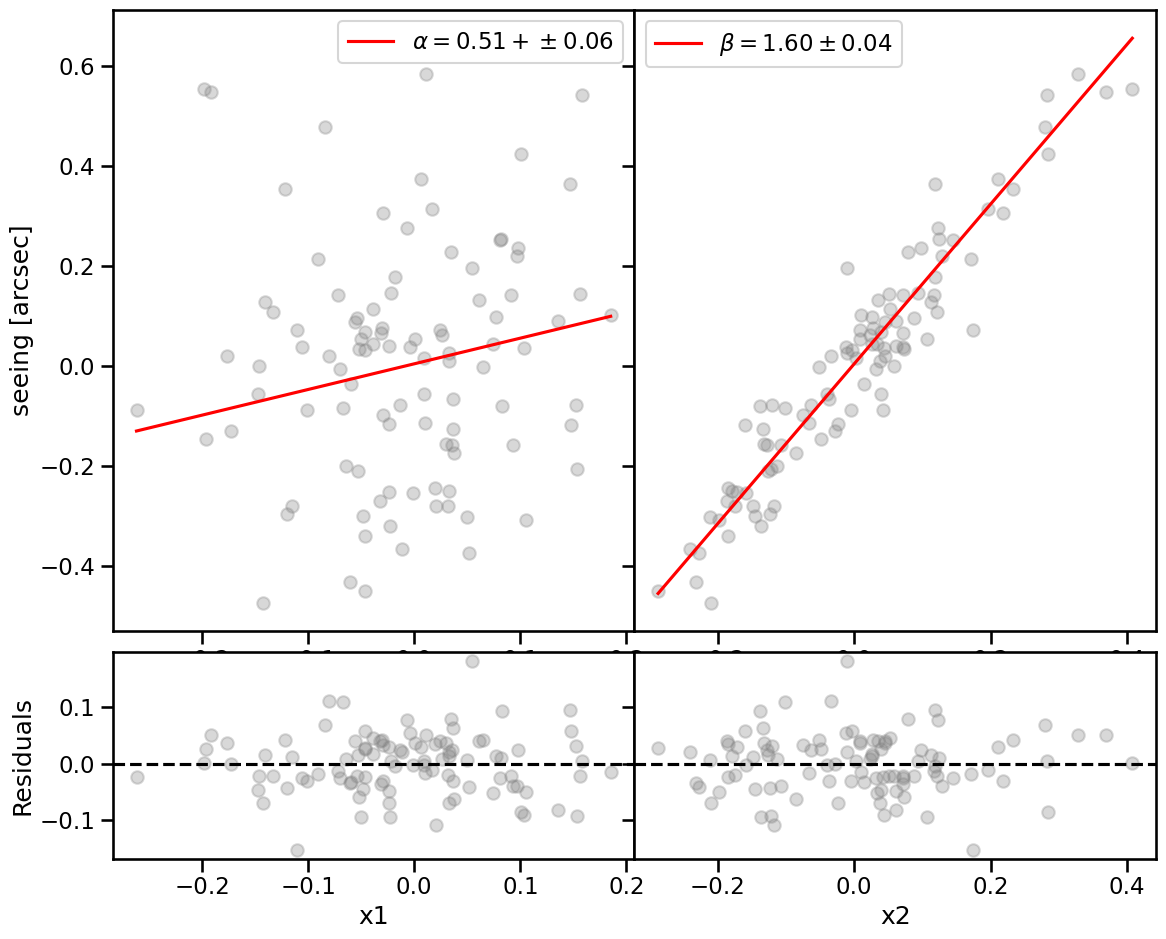

In [698]:
x1, x2, y = get_fake_data()
plot_fit_poly_res(x1, x2, y)